<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/h%C3%A1zi7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100, mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
(train_data, _), (test_data, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [14]:
train_data.shape

(60000, 28, 28)

In [15]:
trdf = train_data.astype("float32") / 255

In [16]:
trdf = np.reshape(trdf, (len(trdf), 28, 28, 1))

In [17]:
tsdf = test_data.astype("float32") / 255
trdf = np.reshape(tsdf, (len(tsdf), 28, 28, 1))

In [19]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)

    return np.clip(noisy_array, 0.0, 1.0)

In [20]:
noisy_train = noise(trdf)
noisy_test = noise(tsdf)

In [21]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

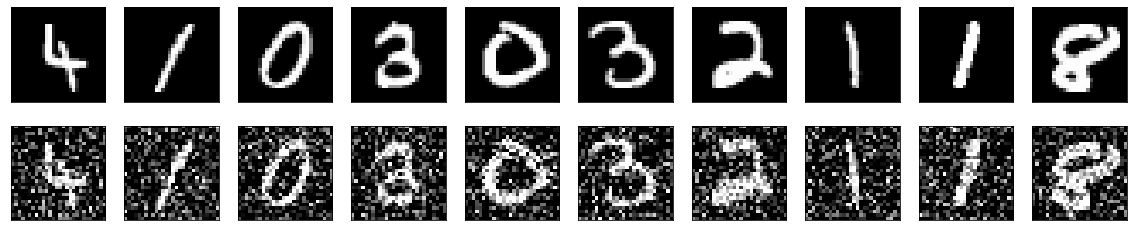

In [22]:
display(trdf, noisy_train)

In [23]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [24]:
autoencoder.fit(x=trdf, y=trdf, epochs=50, batch_size=128, shuffle=True, validation_data=(tsdf, tsdf),)

Epoch 1/50
79/79 [==============================] - 30s 364ms/step - loss: 0.3606 - val_loss: 0.1510
Epoch 2/50
79/79 [==============================] - 29s 368ms/step - loss: 0.1064 - val_loss: 0.0878
Epoch 3/50
79/79 [==============================] - 31s 392ms/step - loss: 0.0840 - val_loss: 0.0808
Epoch 4/50
79/79 [==============================] - 33s 413ms/step - loss: 0.0787 - val_loss: 0.0768
Epoch 5/50
79/79 [==============================] - 28s 359ms/step - loss: 0.0757 - val_loss: 0.0746
Epoch 6/50
79/79 [==============================] - 28s 358ms/step - loss: 0.0738 - val_loss: 0.0731
Epoch 7/50
79/79 [==============================] - 30s 378ms/step - loss: 0.0725 - val_loss: 0.0724
Epoch 8/50
79/79 [==============================] - 29s 364ms/step - loss: 0.0717 - val_loss: 0.0713
Epoch 9/50
79/79 [==============================] - 28s 358ms/step - loss: 0.0710 - val_loss: 0.0708
Epoch 10/50
79/79 [==============================] - 36s 461ms/step - loss: 0.0705 - val_lo

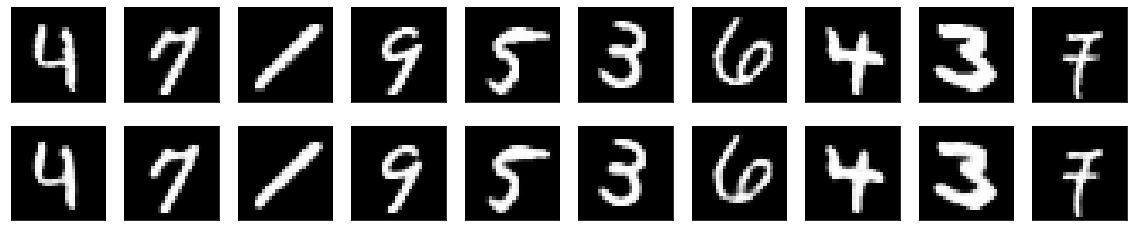

In [26]:
predictions = autoencoder.predict(tsdf)
display(tsdf, predictions)

In [27]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [28]:
autoencoder.fit(x=noisy_train, y=trdf, epochs=50, batch_size=128, shuffle=True, validation_data=(noisy_test, tsdf), callbacks = [early_stopping_callback])

Epoch 1/50
79/79 [==============================] - 30s 375ms/step - loss: 0.1239 - val_loss: 0.1005
Epoch 2/50
79/79 [==============================] - 29s 374ms/step - loss: 0.0986 - val_loss: 0.0973
Epoch 3/50
79/79 [==============================] - 29s 373ms/step - loss: 0.0963 - val_loss: 0.0957
Epoch 4/50
79/79 [==============================] - 29s 373ms/step - loss: 0.0950 - val_loss: 0.0947
Epoch 5/50
79/79 [==============================] - 29s 373ms/step - loss: 0.0942 - val_loss: 0.0940
Epoch 6/50
79/79 [==============================] - 29s 372ms/step - loss: 0.0936 - val_loss: 0.0934
Epoch 7/50
79/79 [==============================] - 29s 372ms/step - loss: 0.0930 - val_loss: 0.0930
Epoch 8/50
79/79 [==============================] - 29s 372ms/step - loss: 0.0926 - val_loss: 0.0926
Epoch 9/50
79/79 [==============================] - 29s 374ms/step - loss: 0.0922 - val_loss: 0.0923
Epoch 10/50
79/79 [==============================] - 29s 373ms/step - loss: 0.0919 - val_lo

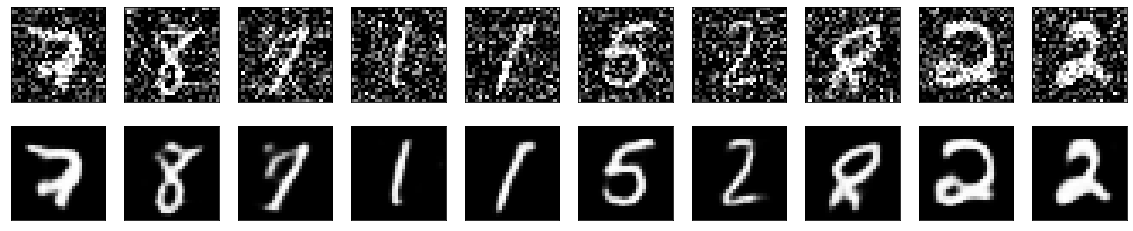

In [29]:
predictions = autoencoder.predict(noisy_test)
display(noisy_test, predictions)